In [1]:
!python dataset.py

In [2]:
!python train.py

  0% 0/1647 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
100% 1647/1647 [00:11<00:00, 137.44it/s]
epoch : 0  average loss : 91.1023515748775


In [9]:
import torch
import numpy as np
from model import encoder,decoder
import matplotlib.pyplot as plt

model1 = encoder(219)
model2 = decoder(219)
model1.load_state_dict(torch.load('model1_encoder.pt',map_location=torch.device('cpu')))
model2.load_state_dict(torch.load('model2_decoder.pt',map_location=torch.device('cpu')))

model1.eval()
model2.eval()
device = 'cpu'
concat = np.load('concat.npy')
concat = concat.astype('float32')
test = torch.from_numpy(concat)

encode = model1(test.to(device))
decode = model2(encode)
decode = decode.detach().numpy()

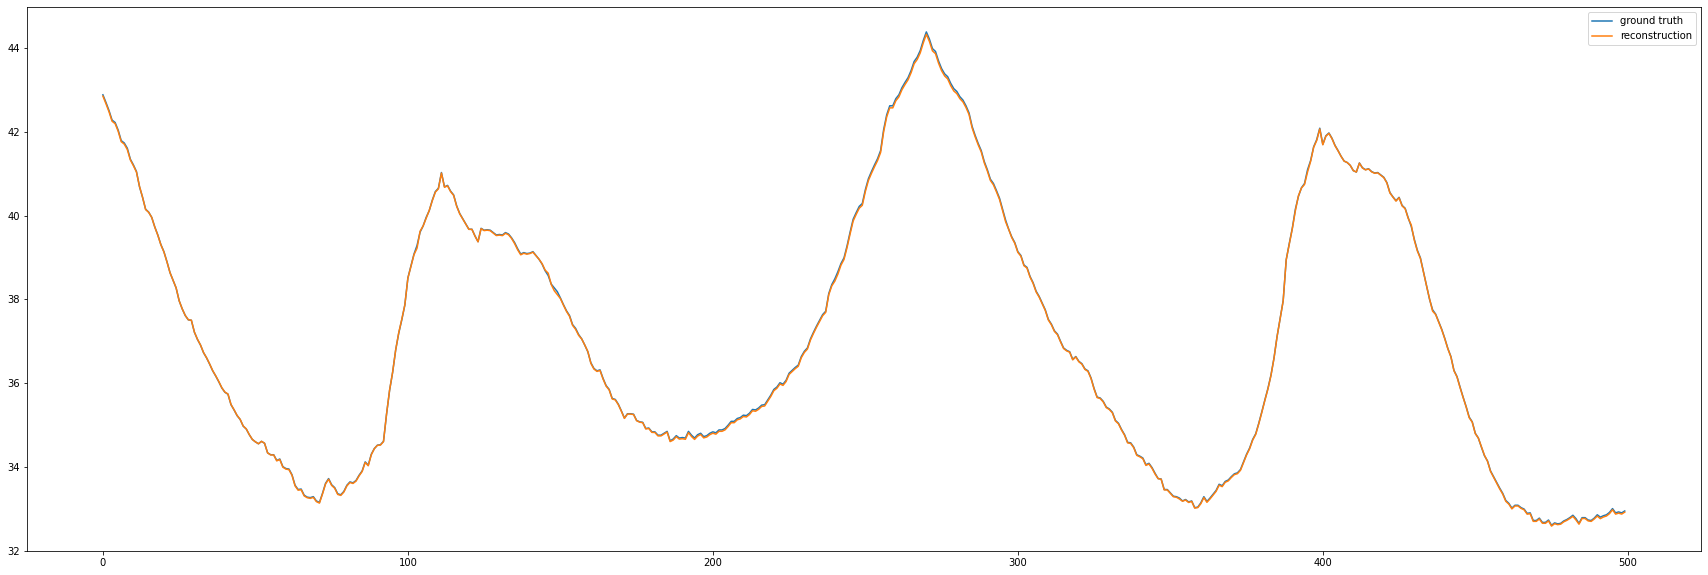

In [14]:
channel = 15
start = 5000
finish = 5500
plt.figure(figsize=(30,10))
plt.plot(concat[start:finish,channel],label='ground truth')
plt.plot(decode[start:finish,channel],label='reconstruction')
plt.legend(loc='best')
plt.show()